In [42]:
import geopandas as gpd
import numpy as np
from shapely.geometry import LineString, Polygon,Point
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
polygon = gpd.read_file("polygon.geojson")

In [4]:
polygon

,type,geometry
0,4,"LINESTRING (77.61838 13.04776, 77.61993 13.047..."
1,8,"LINESTRING (77.61888 13.03738, 77.61909 13.038..."
2,4,"LINESTRING (77.61216 13.04570, 77.61315 13.045..."
3,14,"LINESTRING (77.60607 13.04616, 77.60609 13.043..."
4,4,"LINESTRING (77.61689 13.03644, 77.61852 13.036..."
...,...,...
67,4,"LINESTRING (77.61781 13.03971, 77.61752 13.038..."
68,4,"LINESTRING (77.61225 13.03648, 77.61383 13.036..."
69,4,"LINESTRING (77.61743 13.03850, 77.61865 13.038..."
70,4,"LINESTRING (77.62056 13.03709, 77.62326 13.036..."


In [6]:
def convert_linestrings_to_polygons(gdf):
    polygons = []
    types = []  # List to store corresponding types
    for idx, geom in enumerate(gdf.geometry):
        if isinstance(geom, LineString):
            # Simplify the LineString
            simplified_geom = geom
            
            # Check if the simplified LineString is closed
            if simplified_geom.is_ring:  # If the LineString is closed
                polygons.append(Polygon(simplified_geom.coords))
            else:
                # Create a polygon by using the buffer method
                polygon = simplified_geom.buffer(0)  # Creates a polygon from a LineString
                polygons.append(polygon)
            
            # Append the corresponding type
            types.append(gdf['type'].iloc[idx])

    # Create a new GeoDataFrame with polygons and types
    return gpd.GeoDataFrame({'geometry': polygons, 'type': types}, crs=gdf.crs)

# Convert LineStrings to Polygons
gdf_polygons = convert_linestrings_to_polygons(polygon)

<Axes: >

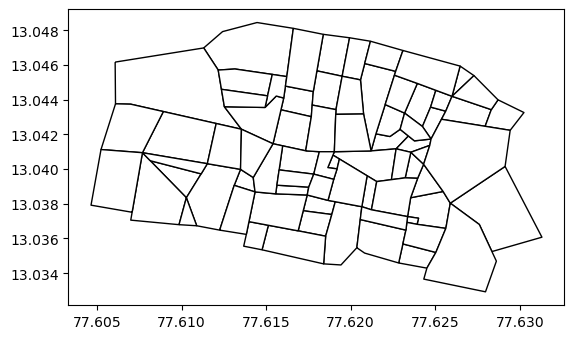

In [9]:
gdf_polygons.plot(color="white",edgecolor="black")

In [10]:
roads = gpd.read_file('roads.geojson')

In [30]:
import geopandas as gpd
from shapely.geometry import LineString

def split_linestring_to_single_lines(gdf):
    """
    Convert a GeoDataFrame with LineString geometries containing multiple points 
    into a GeoDataFrame with individual LineStrings, each containing two consecutive points.
    
    :param gdf: GeoDataFrame with LineString geometries
    :return: New GeoDataFrame with individual LineStrings
    """
    # List to hold all individual LineStrings
    all_lines = []
    
    # Iterate over each row in the GeoDataFrame
    for _, row in gdf.iterrows():
        geometry = row['geometry']
        
        if isinstance(geometry, LineString):
            # Get the coordinates from the LineString
            points = list(geometry.coords)
            
            # Create a new LineString for each consecutive pair of points
            for i in range(len(points) - 1):
                new_line = LineString([points[i], points[i + 1]])
                all_lines.append(new_line)
        else:
            # If the geometry is not a LineString (though it should be), skip it
            continue
    
    # Create a new GeoDataFrame from the list of individual LineStrings
    new_gdf = gpd.GeoDataFrame(geometry=all_lines, crs=gdf.crs)
    return new_gdf


# Split LineStrings into individual LineStrings with two consecutive points
gdf_roads = split_linestring_to_single_lines(roads[roads['type']=="2"])
gdf_roads['type']="2"
# Print the new GeoDataFrame


In [23]:
boundary = gpd.read_file('boundary.geojson')

In [26]:
gdf_boundary = split_linestring_to_single_lines(boundary[boundary['type']=="3"])

In [29]:
gdf_boundary['type']="3"

In [38]:
drainage = gpd.read_file('drainage.geojson')

In [39]:
gdf_drainage = split_linestring_to_single_lines(drainage[drainage['type']=="16"])

In [41]:
gdf_drainage['type']="16"

<Axes: >

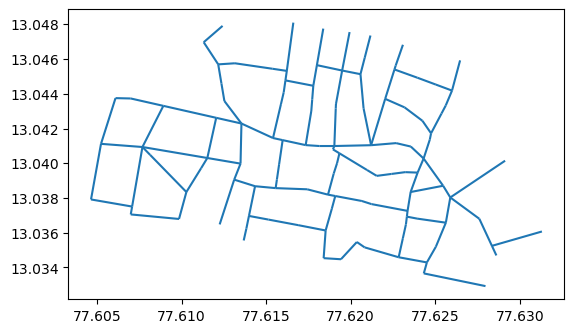

In [40]:
gdf_drainage.plot()

In [47]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

def extract_points_from_linestrings(gdf):
    """
    Extract the individual points from each LineString in the GeoDataFrame and return a new GeoDataFrame of Points.

    :param gdf: GeoDataFrame with LineString geometries
    :return: New GeoDataFrame with Point geometries
    """
    # List to store the individual Point geometries
    points_list = []
    
    # Iterate over each row in the GeoDataFrame
    for _, row in gdf.iterrows():
        geometry = row['geometry']
        
        if isinstance(geometry, LineString):
            # Extract each point from the LineString as a Point geometry
            points = [Point(coord) for coord in geometry.coords]
            points_list.extend(points)  # Add the points to the list
    
    # Create a new GeoDataFrame from the list of points
    points_gdf = gpd.GeoDataFrame(geometry=points_list, crs=gdf.crs)
    return points_gdf

# Example usage:
# Assuming `gdf_roads` and `gdf_boundary` are existing GeoDataFrames with LineString geometries
# Here we're concatenating them together for the sake of example


# Combine the two GeoDataFrames
gdf_combined = pd.concat([gdf_roads, gdf_boundary])

# Extract the points as a new GeoDataFrame
points_gdf = extract_points_from_linestrings(gdf_combined)

# Print the resulting GeoDataFrame with Points
print(points_gdf)


                      geometry
0    POINT (77.61903 13.04100)
1    POINT (77.61911 13.04315)
2    POINT (77.61911 13.04315)
3    POINT (77.61913 13.04342)
4    POINT (77.61913 13.04342)
..                         ...
433  POINT (77.61864 13.04008)
434  POINT (77.61864 13.04008)
435  POINT (77.61919 13.04001)
436  POINT (77.60609 13.04376)
437  POINT (77.60523 13.04112)

[438 rows x 1 columns]


In [52]:
points_gdf['type']=15

In [53]:
current_gdf = pd.concat([gdf_polygons,gdf_roads,gdf_boundary,gdf_drainage,points_gdf])

In [59]:
current_gdf = current_gdf[current_gdf['type']!="Feature"]

In [60]:
current_gdf

,geometry,type
0,"POLYGON ((77.61838 13.04776, 77.61993 13.04756...",4
1,"POLYGON ((77.61888 13.03738, 77.61909 13.03812...",8
2,"POLYGON ((77.61216 13.04570, 77.61315 13.04576...",4
3,"POLYGON ((77.60607 13.04616, 77.60609 13.04376...",14
4,"POLYGON ((77.61689 13.03644, 77.61852 13.03613...",4
...,...,...
433,POINT (77.61864 13.04008),15
434,POINT (77.61864 13.04008),15
435,POINT (77.61919 13.04001),15
436,POINT (77.60609 13.04376),15


In [96]:
import numpy as np
from shapely.geometry import Point, Polygon, LineString

def calculate_aspect_ratio_x(x_min, x_max, new_min_x, new_max_x):
    """
    Calculate the aspect ratio based only on the X values of the bounding box and scaling.
    
    :param x_min: Minimum X coordinate of the entire dataset
    :param x_max: Maximum X coordinate of the entire dataset
    :param new_min_x: New minimum scale value for X-axis
    :param new_max_x: New maximum scale value for X-axis
    :return: Aspect ratio based on the X-axis only
    """
    original_width = x_max - x_min  # Original width based on x-coordinates
    scaled_width = new_max_x - new_min_x  # Scaled width based on the new X range
    
    # Calculate the aspect ratio based only on the X values
    aspect_ratio_x = original_width / scaled_width
    return aspect_ratio_x

def scale_and_floor_geometry(geometry, x_min, y_min, x_max, y_max, new_min_x=0, new_max_x=1000, new_min_y=0, new_max_y=1000):
    """
    Scale and floor the coordinates of a given Shapely geometry to the range [new_min_x, new_max_x] for x 
    and [new_min_y, new_max_y] for y.
    
    :param geometry: Shapely geometry (Point, LineString, Polygon, etc.)
    :param x_min: Minimum X coordinate of the entire dataset
    :param y_min: Minimum Y coordinate of the entire dataset
    :param x_max: Maximum X coordinate of the entire dataset
    :param y_max: Maximum Y coordinate of the entire dataset
    :param new_min_x: New minimum scale value for X-axis (default 0)
    :param new_max_x: New maximum scale value for X-axis (default 1000)
    :param new_min_y: New minimum scale value for Y-axis (default 0)
    :param new_max_y: New maximum scale value for Y-axis (default 1000)
    :return: Scaled and floored Shapely geometry
    """
    if geometry.geom_type == 'Point':
        x, y = geometry.x, geometry.y
        # Apply separate scaling for x and y
        scaled_x = ((x - x_min) / (x_max - x_min)) * (new_max_x - new_min_x) + new_min_x
        scaled_y = ((y - y_min) / (y_max - y_min)) * (new_max_y - new_min_y) + new_min_y
        # Apply flooring
        return Point(np.floor(scaled_x), np.floor(scaled_y))
    
    elif geometry.geom_type == 'LineString':
        scaled_coords = [
            [
                np.floor(((x - x_min) / (x_max - x_min)) * (new_max_x - new_min_x) + new_min_x),
                np.floor(((y - y_min) / (y_max - y_min)) * (new_max_y - new_min_y) + new_min_y)
            ]
            for x, y in geometry.coords
        ]
        return LineString(scaled_coords)
    
    elif geometry.geom_type == 'Polygon':
        scaled_exterior = [
            (
                np.floor(((x - x_min) / (x_max - x_min)) * (new_max_x - new_min_x) + new_min_x),
                np.floor(((y - y_min) / (y_max - y_min)) * (new_max_y - new_min_y) + new_min_y)
            )
            for x, y in geometry.exterior.coords
        ]
        scaled_interior = [
            [
                (
                    np.floor(((x - x_min) / (x_max - x_min)) * (new_max_x - new_min_x) + new_min_x),
                    np.floor(((y - y_min) / (y_max - y_min)) * (new_max_y - new_min_y) + new_min_y)
                )
            ]
            for ring in geometry.interiors for x, y in ring.coords
        ]
        return Polygon(scaled_exterior, scaled_interior)
    
    return geometry  # In case of other types (MultiPolygon, etc.), return as is

def scale_and_floor_all_geometries(gdf, new_min_x=0, new_max_x=1000, new_min_y=0, new_max_y=1000):
    """
    Scale and floor all geometries in the GeoDataFrame to the range [new_min_x, new_max_x] for x 
    and [new_min_y, new_max_y] for y.
    
    :param gdf: GeoDataFrame containing the geometries (points, lines, polygons)
    :param new_min_x: New minimum scale value for X-axis (default 0)
    :param new_max_x: New maximum scale value for X-axis (default 1000)
    :param new_min_y: New minimum scale value for Y-axis (default 0)
    :param new_max_y: New maximum scale value for Y-axis (default 1000)
    :return: GeoDataFrame with scaled and floored geometries
    """
    # Reproject to a Cartesian CRS (e.g., UTM) if not already in one (this step is optional)
    gdf = gdf.to_crs(epsg=32633)  # UTM Zone 33N as an example, you can change the EPSG based on your location
    
    # Get the min and max of X and Y coordinates across the entire dataset
    x_min, y_min, x_max, y_max = gdf.total_bounds
    
    # Calculate aspect ratio based on X coordinates
    aspect_ratio_x = calculate_aspect_ratio_x(x_min, x_max, new_min_x, new_max_x)
    
    # Apply the scaling and flooring to each geometry
    gdf['geometry'] = gdf['geometry'].apply(lambda geometry: scale_and_floor_geometry(
        geometry, x_min, y_min, x_max, y_max, new_min_x, new_max_x, new_min_y, new_max_y
    ))
    
    return gdf, aspect_ratio_x

# Example usage:
# Assuming you have a GeoDataFrame `gdf` containing various geometries (points, polygons, lines)
x_min, y_min, x_max, y_max = 0, 0, 100, 50  # Example bounding box (x_min, y_min, x_max, y_max)
new_min_x, new_max_x = 0, 1000  # New range for X-axis
new_min_y, new_max_y = 0, 500  # New range for Y-axis

scaled_gdf, aspect_ratio_x = scale_and_floor_all_geometries(
    current_gdf, new_min_x=new_min_x, new_max_x=new_max_x, new_min_y=new_min_y, new_max_y=new_max_y
)

print(f"Aspect Ratio (X Only): {aspect_ratio_x}")


Aspect Ratio (X Only): 5.924808412477374


<Axes: >

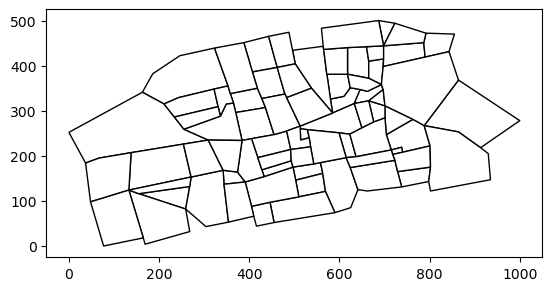

In [97]:
scaled_gdf[scaled_gdf['geometry'].geom_type=="Polygon"].plot(color="white",edgecolor="black")

<Axes: >

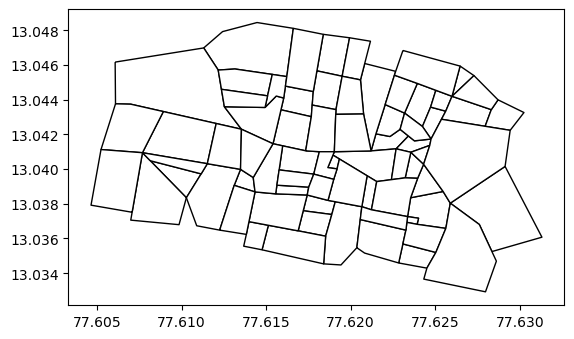

In [98]:
current_gdf[current_gdf['geometry'].geom_type=="Polygon"].plot(color="white",edgecolor="black")

In [103]:
import pickle

In [106]:
with open('current_gdf.p','wb') as f:
    pickle.dump(scaled_gdf,f)

In [146]:
old_polygons = gpd.read_file('old_polygon.geojson')

In [149]:
gdf_old_polygons = convert_linestrings_to_polygons(old_polygons)

<Axes: >

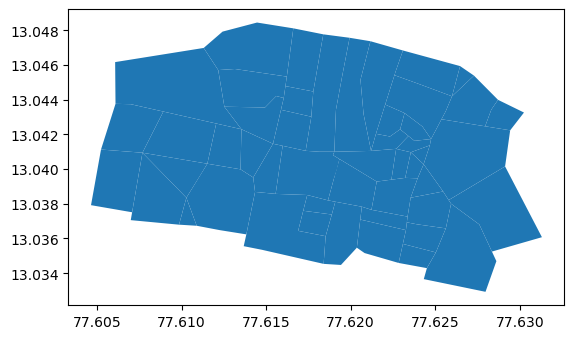

In [150]:
gdf_old_polygons.plot()

In [119]:
roads

,type,geometry
0,2,"LINESTRING (77.61903 13.04100, 77.61911 13.043..."
1,2,"LINESTRING (77.62308 13.03569, 77.62503 13.03520)"
2,4,"LINESTRING (77.61838 13.04776, 77.61993 13.047..."
3,8,"LINESTRING (77.61888 13.03738, 77.61909 13.038..."
4,2,"LINESTRING (77.61899 13.03941, 77.61781 13.039..."
...,...,...
131,2,"LINESTRING (77.61236 13.04459, 77.61508 13.04422)"
132,4,"LINESTRING (77.61743 13.03850, 77.61865 13.038..."
133,4,"LINESTRING (77.62056 13.03709, 77.62326 13.036..."
134,4,"LINESTRING (77.62309 13.04683, 77.62647 13.045..."


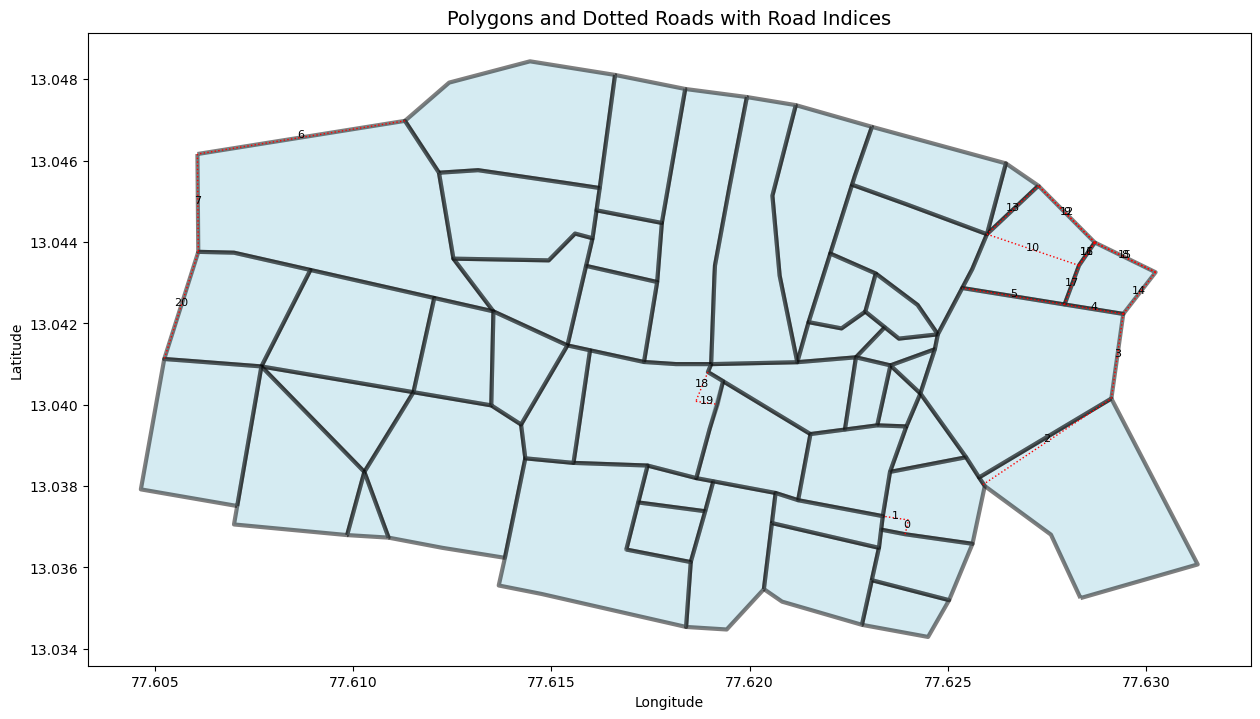

In [128]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# Example: Plotting gdf_old_polygons and roads together, with index of roads in the middle of the LineString

# Assuming `gdf_old_polygons` and `roads` are preloaded GeoDataFrames.

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the polygons first (gdf_old_polygons)
gdf_old_polygons.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5, linewidth=3)

# Plot the roads GeoDataFrame (roads) with a dotted line style
gdf_boundary.plot(ax=ax, color='red', linestyle=':', linewidth=1)

# Add the index of the roads in the middle of each LineString
for idx, road in gdf_boundary.iterrows():
    # Get the geometry of the current road (LineString)
    line = road.geometry
    
    if isinstance(line, LineString):
        # Calculate the midpoint of the LineString manually
        coords = list(line.coords)
        x_coords, y_coords = zip(*coords)
        
        # Midpoint is the average of the x and y coordinates
        midpoint_x = sum(x_coords) / len(x_coords)
        midpoint_y = sum(y_coords) / len(y_coords)
        
        # Plot the index of the road at the midpoint
        ax.text(midpoint_x, midpoint_y, str(idx), fontsize=8, ha='center', color='black')

# Set title and labels
ax.set_title("Polygons and Dotted Roads with Road Indices", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()


In [ ]:
# List of indexes to delete
indexes_to_delete = set([191, 35, 36, 150, 105, 133, 132, 139, 6, 195, 194, 193, 5, 60, 192, 97, 96, 190, 95, 104, 16, 165, 181, 103, 182, 148, 149, 128,11,71])

# Create a copy of gdf_roads
gdf_roads_copy = gdf_roads.copy()

# Drop the rows with the specified indexes
gdf_roads_copy = gdf_roads_copy.drop(indexes_to_delete)

# Now gdf_roads_copy contains the data with the specified rows removed


In [ ]:
# List of indexes to delete
indexes_to_delete = set([10,18,19,1,0,2])

# Create a copy of gdf_roads
gdf_boundary_copy = gdf_roads.copy()

# Drop the rows with the specified indexes
gdf_boundary_copy = gdf_boundary_copy.drop(indexes_to_delete)

# Now gdf_roads_copy contains the data with the specified rows removed


In [156]:
old_gdf = pd.concat([gdf_old_polygons,gdf_roads_copy,gdf_boundary_copy])

In [157]:
old_gdf.loc[old_gdf['type']=="Feature","type"]=1

<Axes: >

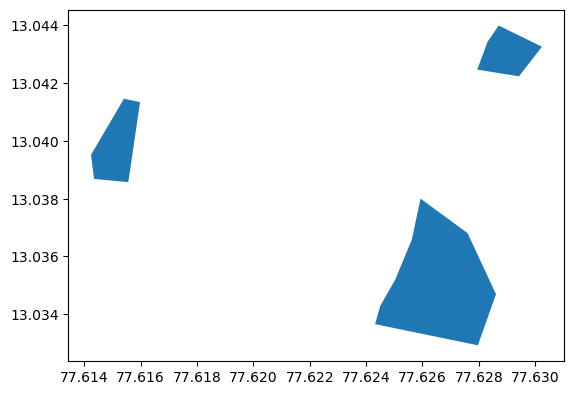

In [158]:
old_gdf[old_gdf['type']=="7"].plot()

In [159]:
scaled_old_gdf, aspect_ratio_x = scale_and_floor_all_geometries(
    old_gdf, new_min_x=new_min_x, new_max_x=new_max_x, new_min_y=new_min_y, new_max_y=new_max_y
)

<Axes: >

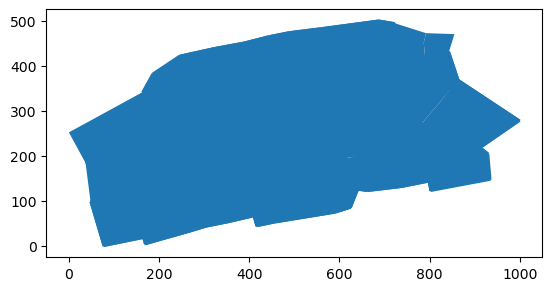

In [160]:
scaled_old_gdf.plot()

In [162]:
with open('old_gdf.p','wb') as f:
    pickle.dump(old_gdf,f)